# Testing the Self Organizing Map

## Importing the Basics

In [1]:
import numpy as np
import random
from machineLearning.nn.scheduler import SteppedLR
from matplotlib import pyplot as plt
from matplotlib import cm
from machineLearning.utility import ModelIO
from machineLearning.som import (
    SOM,
    Rectangular, Hexagonal,
    GuassianNeighborhood
)

## Generating Test Data

Here I generate random test data. It's two blocks shifted very slightly in some dimensions. For classifier tasks each block gets a label, for regressor tasks each block gets the average coordinates plus some random value as a traget. It's a very simple dummy data set meant for testing the code.

Here one can change the dimensionallity and amount of the data.

In [2]:
def dataShift(dims):
    offSet = [5, 1.5, 2.5]
    diffLen = abs(len(offSet) - dims)
    offSet.extend([0] * diffLen)
    random.shuffle(offSet)
    return offSet[:dims]

# Initialize some parameters
totalAmount = 6400
dims = 5
evalAmount = totalAmount // 4
trainAmount = totalAmount - evalAmount
offSet = dataShift(dims)

# Create covariance matrix
cov = np.eye(dims)  # This creates a covariance matrix with variances 1 and covariances 0

# Generate random multivariate data
oneData = np.random.multivariate_normal(np.zeros(dims), cov, totalAmount)
twoData = np.random.multivariate_normal(offSet, cov, totalAmount)

# Split the data into training and evaluation sets
trainData = np.vstack((oneData[:trainAmount], twoData[:trainAmount]))
validData = np.vstack((oneData[trainAmount:], twoData[trainAmount:]))

# Labels for classification tasks
trainLabels = np.hstack((np.zeros(trainAmount), np.ones(trainAmount)))
validLabels = np.hstack((np.zeros(evalAmount), np.ones(evalAmount)))

# Shuffle the training data
trainIndex = np.random.permutation(len(trainData))
trainData = trainData[trainIndex]
trainLabels = trainLabels[trainIndex]

## Setting Up and Training SOM

In this step we are creating a self-organizing map. We can create two type, we can set the grid size and learning rate of the map. Futher we need to init the weights by providing the the smallest and largest value of the data domain.

After that we can train the map, since we are not using a data loader, we need to provide a batch size. Epochs determin how many times we go over the data set.

In [3]:
topology = 'hexagonal' # 'hexagonal'/'rectangular'
grid = SOM(learningRate=0.01, gridSteps=5)
if topology == 'rectangular':
    grid.setComponent(Rectangular(gridSize=(15,15), numFeatures=dims))
elif topology == 'hexagonal':
    grid.setComponent(Hexagonal(gridSize=(15,15), numFeatures=dims))
else:
    raise ValueError(f'{topology} is not a valid option for topology')
grid.setComponent(GuassianNeighborhood(scale=2))
grid.setComponent(SteppedLR(grid, 0.9, 5))
grid.initWeights(trainData)
grid.train(trainData, epochs=10, batchSize=128)

epoch 01/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 23.83413   quantazationError: 0.95146    learningRate: 0.01       gridSteps: 5.0        


epoch 02/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 22.15792   quantazationError: 0.77623    learningRate: 0.01       gridSteps: 5.0        
epoch 03/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 18.67115   quantazationError: 0.72612    learningRate: 0.01       gridSteps: 5.0        
epoch 04/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 14.65538   quantazationError: 0.7051     learningRate: 0.01       gridSteps: 5.0        
epoch 05/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 11.99094   quantazationError: 0.69588    learningRate: 0.01       gridSteps: 5.0        
epoch 06/10 |⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿| done ✔  | 97%
topologyError: 10.91      quantazationError: 0.69009    learningRate: 0.009      gridSteps: 5.0        
epoch

## Counting numbers of data pionts

This runs of data, finds winning nodes and then counts how many data points of each label falls into which winning node. This is done with for train data to get a baseline and with eval data. Also we need to provide a batchSize.

In [4]:
grid.eval(trainData, labels=trainLabels.astype(int), batchSize=128)
grid.eval(validData, labels=validLabels.astype(int), batchSize=128)

## Plotting Data and Weights as Scatter Plots

It is instructive to look at what a self-organizing map does. This is done by plotting coordinates of data and weights pairwise, to see how they match.

In [5]:
def scatterPairwise(data, weights, size: float = 10, colors: list[str, str] = ['tab:blue', 'tab:orange']):
    """
    Create a scatter plot of pairwise dimensions of a multidimensional dataset on a grid.

    Parameters:
    data (ndarray): The multidimensional dataset to be plotted.
    size (float): The size of each scatter point in the plot (default 10).
    color (str): The color of each scatter point in the plot (default 'blue').

    Returns:
    None.
    """
    num_dims = data.shape[1]
    fig, axes = plt.subplots(num_dims, num_dims, figsize=(12, 12))

    for i in range(num_dims):
        for j in range(num_dims):
            if i == j:
                axes[i][j].axis('off')
            else:
                axes[i][j].scatter(data[:, i], data[:, j], s=size, c=colors[0], alpha=0.5,label='data')
                axes[i][j].scatter(weights[:, i], weights[:, j], s=1.5*size, c=colors[1], alpha=1,label='weights')
                axes[i][j].set_xlabel(f"Dim {i}")
                axes[i][j].set_ylabel(f"Dim {j}")
                axes[i,j].legend(loc='best', fontsize='small')

    plt.tight_layout()
    plt.show()

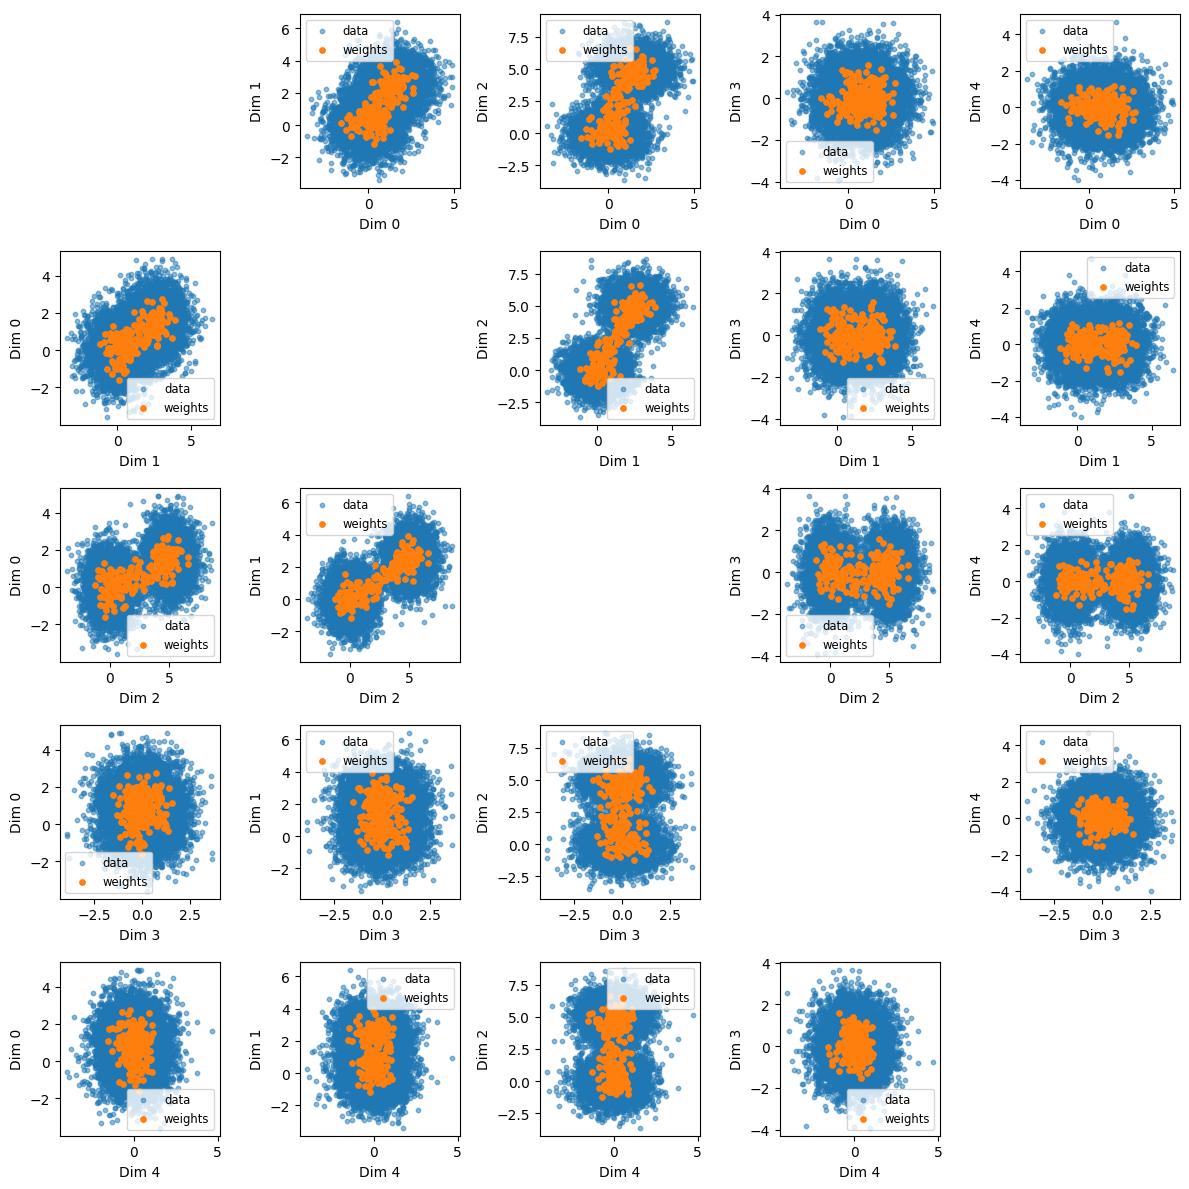

In [6]:
if dims == 2:
    plt.scatter(trainData[:,0],trainData[:,1],label='data')
    plt.scatter(grid.topology.weights[:,0],grid.topology.weights[:,1],label='weights')
    plt.legend()
    plt.show()
else:
    scatterPairwise(trainData, grid.topology.weights)

## Plotting Code

Setting up code for plotting a matrix and a pie-chart repressentation of the self-organizing map.

In [7]:
def map(values: np.ndarray, arange: list = [0,1]) -> np.ndarray:
    assert len(arange) == 2, 'arange must be of length 2'
    assert arange[0] < arange[1], 'arange must start at a lower value than it ends'

    c, d = arange[0], arange[1]
    a, b = np.min(values), np.max(values)

    return c + ((d - c) / (b - a)) * (values - a)

def plotMatrix(matrix, grid, shape='o', size=1):
    plt.figure(figsize=(12,12))  # specify the figure size in inches
    fig, ax = plt.subplots()

    # create an array of points for the grid
    points = grid

    # plot each point
    #colors = []
    values = map(matrix.flatten(), [0,255]).astype('int')
    #for color in values:
    #    colors.append('#' + hex(color)[2:]*3)
    colors = cm.viridis(values)


    ax.scatter(points[:, 0], points[:, 1], color=colors, s=250*size, marker=shape)
    
    ax.set_title('Weight Matrix')

    # Increase the size of the plot (or 'zoom out')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1, points[:,0].max()+1)
    ax.set_ylim(-1, points[:,1].max()+1)

    plt.show()

def plotPies(grid, title, countSet: int = 0):
    fig, ax = plt.subplots(*grid.topology.gridSize, figsize=(10,10))

    # Adjust the subplot parameters to reduce the space between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Set aspect ratio of all subplots to be equal so that the pie charts look like circles, not ellipses
    for a in ax.ravel():
        a.set_aspect('equal')

    for index, count in enumerate(grid.counts[countSet]):
        xx, yy = np.unravel_index(index, grid.topology.gridSize)
        if np.sum(count) > 0:  # check if there are counts for this neuron
            ax[xx,yy].pie(count)
        else:  # if no counts, you can leave it blank or put something else here
            ax[xx,yy].axis('off')

    plt.suptitle(title)
    plt.show()

## Weight and U Matrix

Here we plot first the weights matrix of the self-organizing map, with percentages of data point counts per node/neuron. The same is done with the u-matrix.

<Figure size 1200x1200 with 0 Axes>

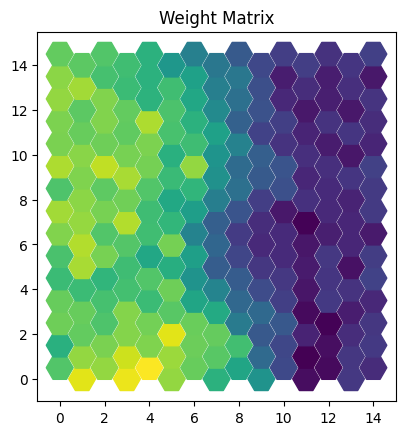

<Figure size 1200x1200 with 0 Axes>

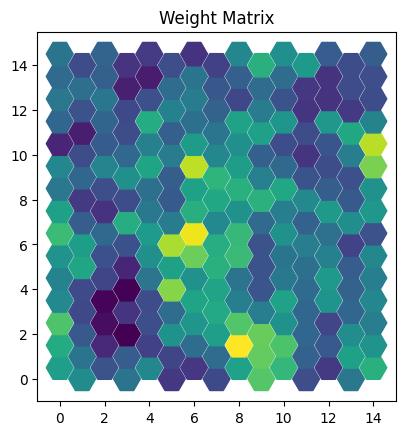

In [8]:
if topology == 'hexagonal':
    plotMatrix(grid.weightMatrix, grid.topology.gridIndices,'H',1.5)
    plotMatrix(grid.uMatrix, grid.topology.gridIndices,'H',1.5)
else:
    plotMatrix(grid.weightMatrix, grid.topology.gridIndices,'s')
    plotMatrix(grid.uMatrix, grid.topology.gridIndices,'s')

## Pie Plots

These plots are rather bare naked, I still hope they can be instructive. Essentially they show the counts from the weight matrix plot as pie plots on a grid representing again every node/neuron of the self-organizing map.

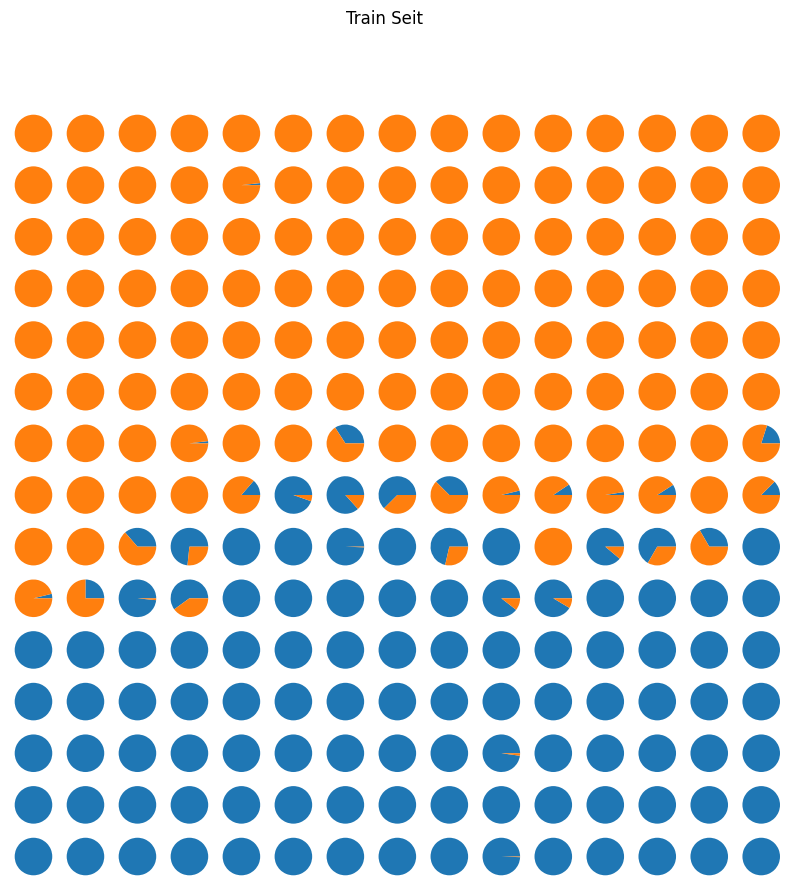

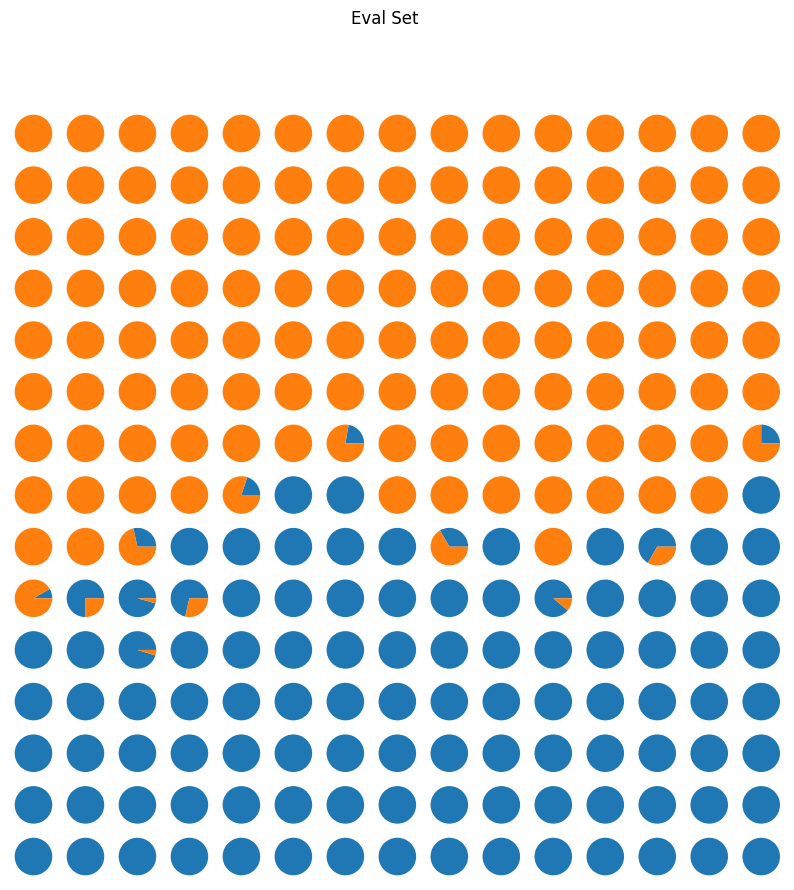

In [9]:
plotPies(grid, "Train Seit", 0)
plotPies(grid, "Eval Set", 1)

## Saving and Loading a SOM

SOM can be converted to dictionaries and then saved as a json file. This allows us to load them and re-use them. Also json is a raw text format, which is neat.

In [10]:
ModelIO.save(grid, 'som-test')
newGrid = ModelIO.load('som-test')

<Figure size 1200x1200 with 0 Axes>

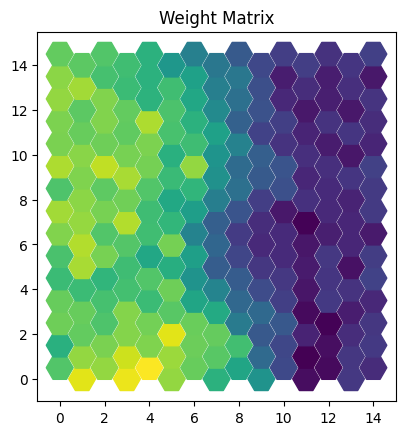

<Figure size 1200x1200 with 0 Axes>

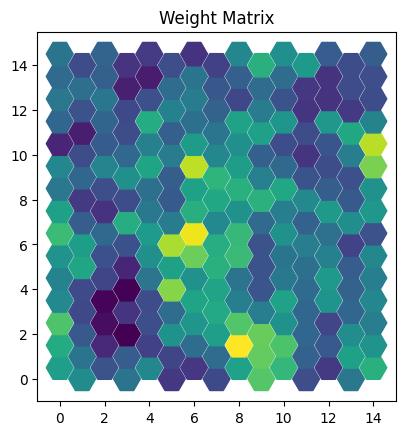

In [11]:
if topology == 'hexagonal':
    plotMatrix(newGrid.weightMatrix, newGrid.topology.gridIndices,'H',1.5)
    plotMatrix(newGrid.uMatrix, newGrid.topology.gridIndices,'H',1.5)
else:
    plotMatrix(newGrid.weightMatrix, newGrid.topology.gridIndices,'s')
    plotMatrix(newGrid.uMatrix, newGrid.topology.gridIndices,'s')

## Comment

The code works fine, but is still in an early stage of development. This shows by not providing sufficient means of meassuring the convergence of the map. Also this map doesn't grow by itself and is fixed to what the user sets in the beginning. Futher any means of assessing its performance are missing.